In [48]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Retrieve the DataFrame that we stored
%store -r pga_data
print(pga_data.info())
df = pga_data.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2971 entries, 0 to 3675
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      2971 non-null   string 
 1   player         2971 non-null   string 
 2   tournament_id  2971 non-null   string 
 3   tournament     2971 non-null   string 
 4   course         2971 non-null   string 
 5   city           2971 non-null   string 
 6   state          2971 non-null   string 
 7   purse          2971 non-null   float64
 8   no_cut         2971 non-null   bool   
 9   finish         2971 non-null   string 
 10  position       2971 non-null   float64
 11  made_cut       2971 non-null   bool   
 12  rounds_played  2971 non-null   int64  
 13  strokes        2971 non-null   int64  
 14  sg_putt        2971 non-null   float64
 15  sg_arg         2971 non-null   float64
 16  sg_app         2971 non-null   float64
 17  sg_ott         2971 non-null   float64
 18  sg_t2g  

1. We can first plot some distributions to see whether our data is normally distributed or not.

Mean strokes gained: Putting: -0.122
Median strokes gained: Putting: -0.09
Standard deviation strokes gained: Putting: 1.071


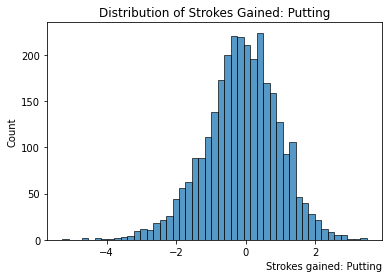

--------------------------------------------------
Mean strokes gained: Around the green: -0.035
Median strokes gained: Around the green: 0.01
Standard deviation strokes gained: Around the green: 0.738


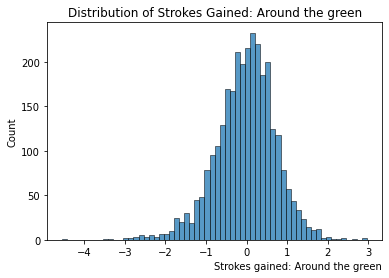

--------------------------------------------------
Mean strokes gained: Approach: -0.113
Median strokes gained: Approach: -0.01
Standard deviation strokes gained: Approach: 1.123


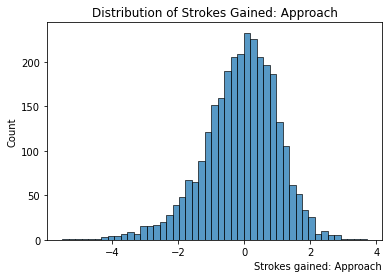

--------------------------------------------------
Mean strokes gained: Off the tee: -0.041
Median strokes gained: Off the tee: 0.03
Standard deviation strokes gained: Off the tee: 0.778


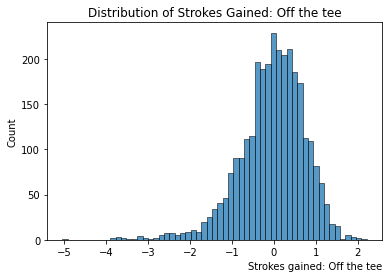

--------------------------------------------------
Mean strokes gained: Tee to green: -0.189
Median strokes gained: Tee to green: -0.05
Standard deviation strokes gained: Tee to green: 1.643


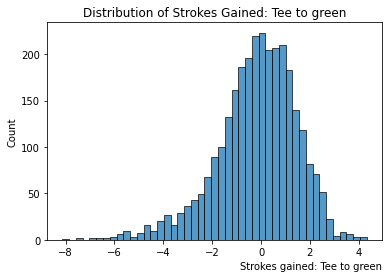

--------------------------------------------------
Mean strokes gained: Total: -0.289
Median strokes gained: Total: -0.15
Standard deviation strokes gained: Total: 1.862


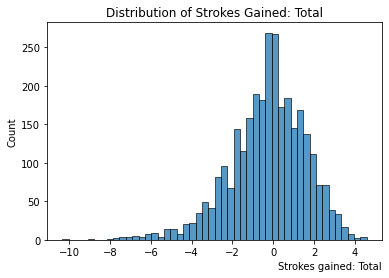

--------------------------------------------------
Mean score per round: 71.1
Median score per round: 71.0
Standard deviation of score per round: 2.4


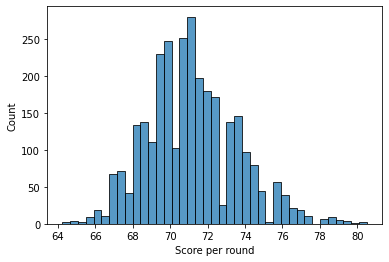

<Figure size 432x288 with 0 Axes>

In [81]:
numeric_vars = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
vars_words = ['Putting', 'Around the green', 'Approach', 'Off the tee', 'Tee to green', 'Total']

for var, word in zip(numeric_vars, vars_words):
    print('Mean strokes gained: {}:'.format(word), np.round(df[var].mean(),3))
    print('Median strokes gained: {}:'.format(word), np.round(df[var].median(),3))
    print('Standard deviation strokes gained: {}:'.format(word), np.round(np.std(df[var]),3))
    sns.histplot(df[var])
    plt.xlabel('Strokes gained: {}'.format(word), loc = 'right')
    plt.title('Distribution of Strokes Gained: {}'.format(word))
    plt.show()
    plt.clf()
    print('-'*50)
    
score_per_round = df.strokes/df.rounds_played
print('Mean score per round:', np.round(np.mean(score_per_round),1))
print('Median score per round:', np.median(score_per_round))
print('Standard deviation of score per round:', np.round(np.std(score_per_round),1))
sns.histplot(df.strokes/df.rounds_played)
plt.xlabel('Score per round')
plt.show()
plt.clf()